## Try PCA on an example image

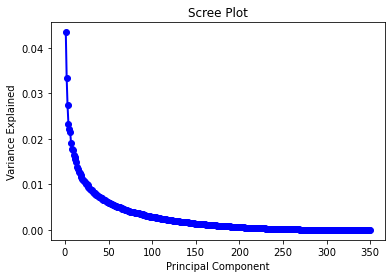

Number of components explaining 99% variance: 225


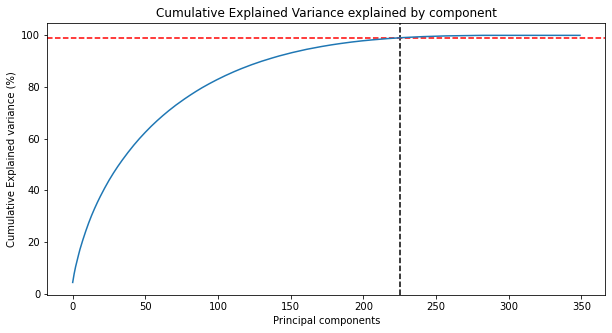

In [7]:
import sys
import cv2
from sklearn.decomposition import PCA 
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

img = cv2.imread('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Preprocessed/Train/A/A_f0006_09.png',0)
pca=PCA()
pca_values=pca.fit_transform(img)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## Elbow is at around 45 Components

var = pca.explained_variance_ratio_
pca.components_[0]
var_cumu = np.cumsum(np.round(var,decimals = 4)*100)
# How many PCs explain 99% of the variance?
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=99, color="r", linestyle="--")
ax = plt.plot(var_cumu)

## About 225 components explains 99% of the variance

## Chose to retain 99% of the variance for model training

## PCA on all the images

In [14]:
import os
data = ['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Data-Preprocessing/Thinning' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Data-Preprocessing/Thinning')]
len(data)

3999

In [11]:
names = ['A_' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/A')]
names.extend(['LL_' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/LL')])
names.extend(['RL_' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/RL')])
names.extend(['TA_' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/TA')])
names.extend(['W_' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/NIST/W')])

In [59]:
import sys
import cv2
from sklearn.decomposition import PCA 
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import imageio
import os
from skimage import img_as_ubyte
os.chdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Data-Preprocessing/PCA')
for s in range(len(data)):
    img = cv2.imread(data[s] + s,0)
    pca=PCA(.99)
    pca_values=pca.fit_transform(img)
    temp = pca.inverse_transform(pca_values)
    temp = np.reshape(temp, img.shape)
    cv2.imwrite(names[x], temp)